<a href="https://colab.research.google.com/github/amarildo86/datascience/blob/master/Ifood_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

colortheme = ["#e74c3c", "#3498db", "#95a5a6", "#9b59b6", "#34495e", "#2ecc71"]
sns.set_palette(colortheme)

warnings.simplefilter("ignore")

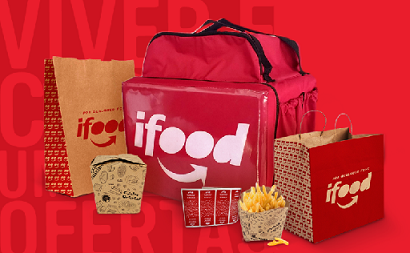

**Case - Data Analyst**

iFood is a Brazilian foodtech founded in 2011, active in the field of food delivery over the internet, being a leader in the sector in Latin America, with a presence in Argentina, Mexico and Colombia.

**Challenge**

To understand the data, find business opportunities & insights and to propose
any data driven action to optimize the campaigns results & generate value to the company.

**Knowing the dataset**

In [24]:
ifood = pd.read_csv('//content//ml_project1_data.csv')
ifood.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [25]:
ifood.shape

(2240, 29)

**Identifying the variable types**

In [26]:
ifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [27]:
ifood_clear = ifood.dropna()

**Dispersion plot to each variable (pairplot)**

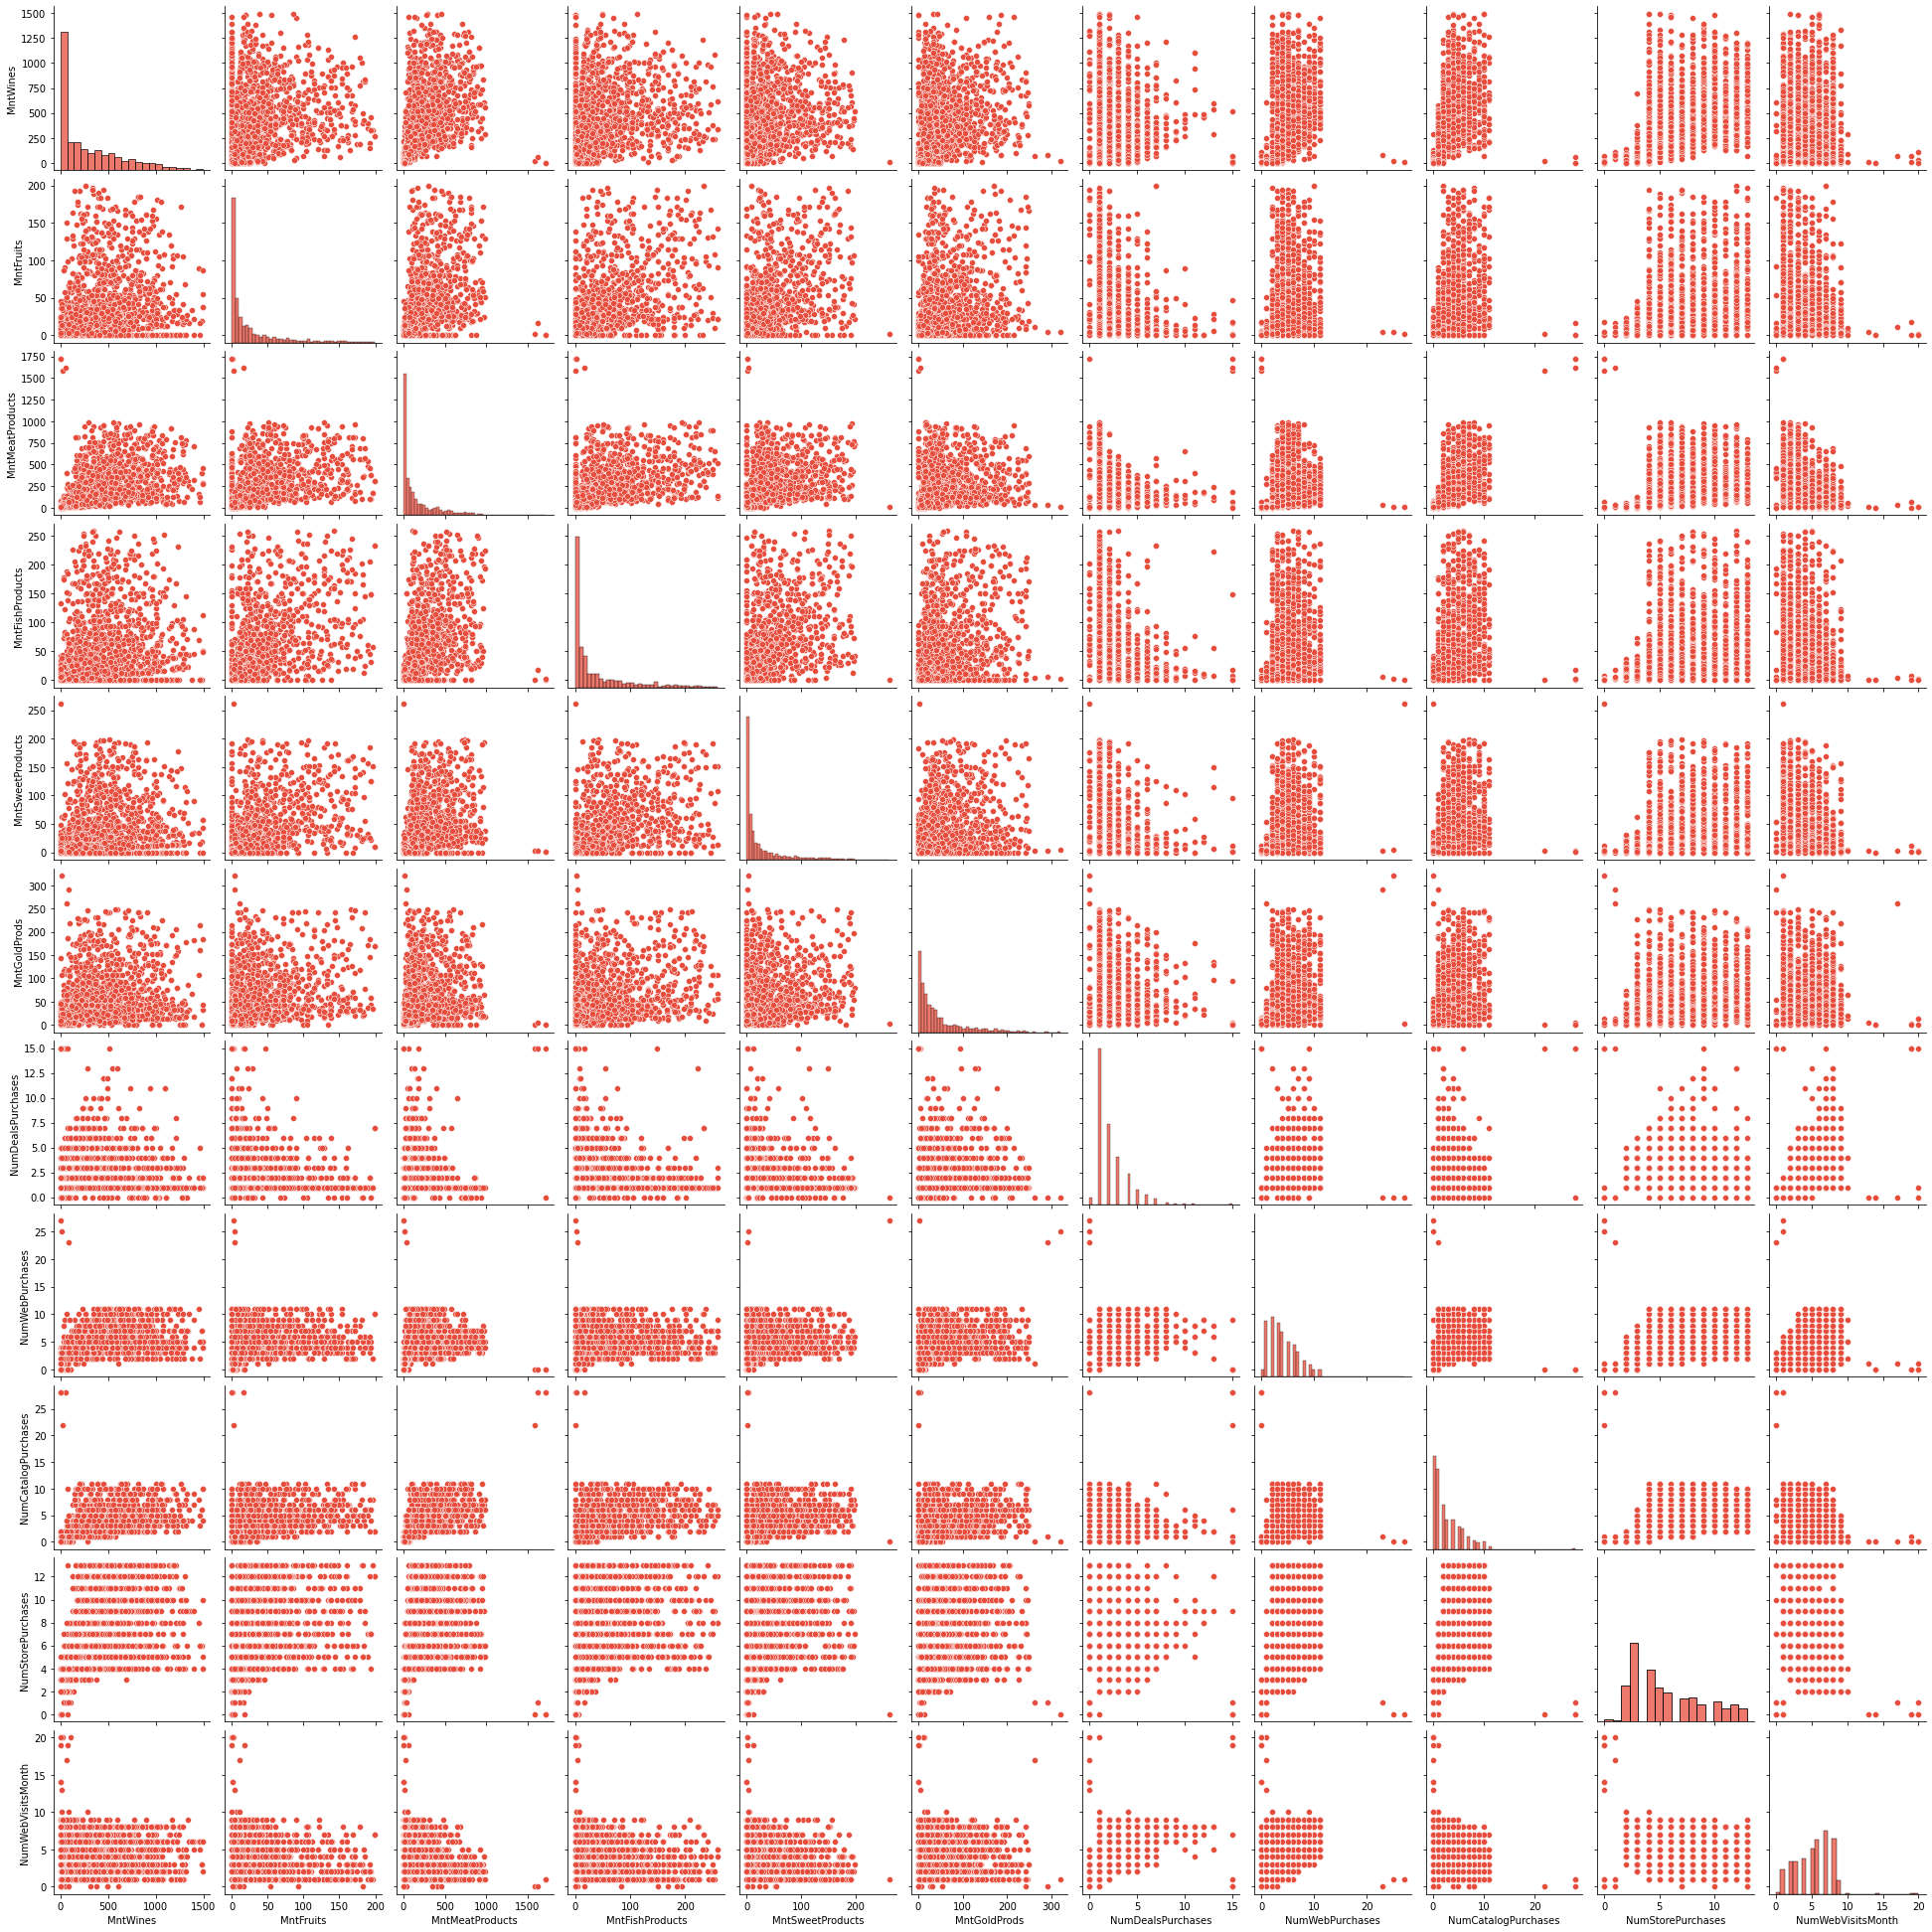

In [28]:
sns.pairplot(ifood_clear.iloc[:, 9:20])

Pairplot is a very useful technique for finding correlation patterns between features. It is possible to observe, for example, that the variable "MntWine" has a strong correlation with the variable "MntMeatProducts".
.

**Correlation matrix with hierarchical grouping**

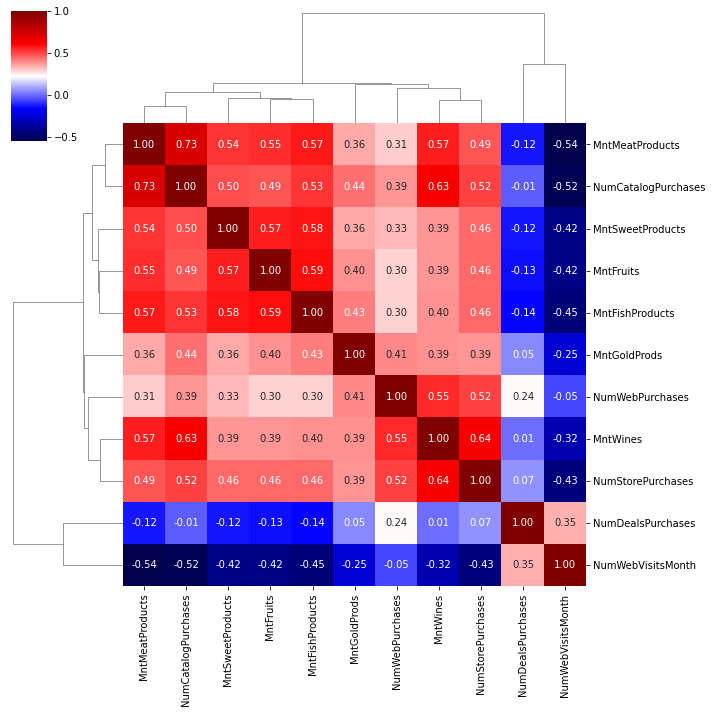

In [29]:
corr_matrix = ifood_clear.iloc[:, 9:20].corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", cmap='seismic')

Even if correlation does not indicate causality, we must pay attention to this step.

Two points here draw attention:


The ** correlation ** of 0.73 (strong) between "** MntMeatProducts **" and "** 

*   The **correlation** of 0.73 (strong) between "**MntMeatProducts**" and "**NumCatalogPurchases**" may suggest that a large part of the catalog purchases are in fact products that have meat as their main dish . However, we must validate this hypothesis as statistical tests.


*   likewise, **correlation** of 0.63 (weak) between "**MntWines**" and "**NumCatalogPurchases**" may suggest that customers like to buy wines through the main catalog. However, we must validate this hypothesis as statistical tests.





**Dataframe slice to work with specific purchasing data x family, educational and marital status characteristics of customers**

In [30]:
best_products = ifood_clear.loc[:, ['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
best_products['Purchased Itens'] = best_products.iloc[:, 3:].sum(axis=1)

**Knowing customer's marital status**

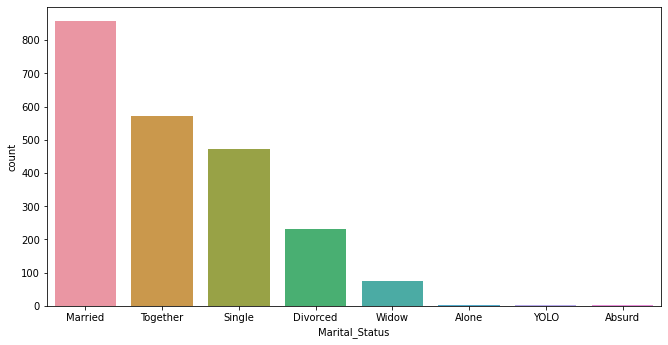

In [31]:
plt.figure(figsize=(11, 5.5))
sns.countplot(x='Marital_Status', data=best_products, order=best_products['Marital_Status'].value_counts().index)

**Knowing customer's education level**

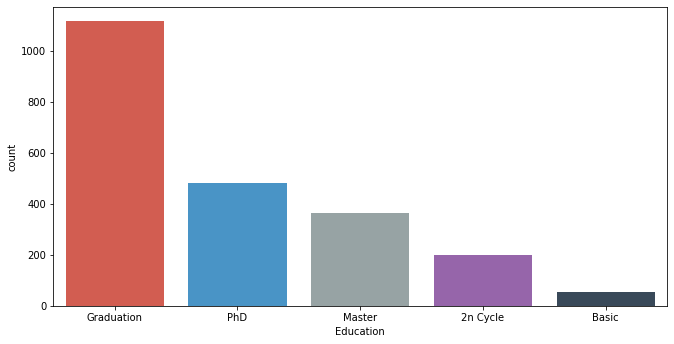

In [32]:
plt.figure(figsize=(11, 5.5))
sns.countplot(x='Education', data=best_products, order=best_products['Education'].value_counts().index)

It is visible (and in a way expected - because it is a Brazilian base) that the number of customers who have degrees is considerably greater than the other groups. This information can be used for targeted offers.

**Boxplot: Consumption pattern in Ifood x Number of kid in the family**

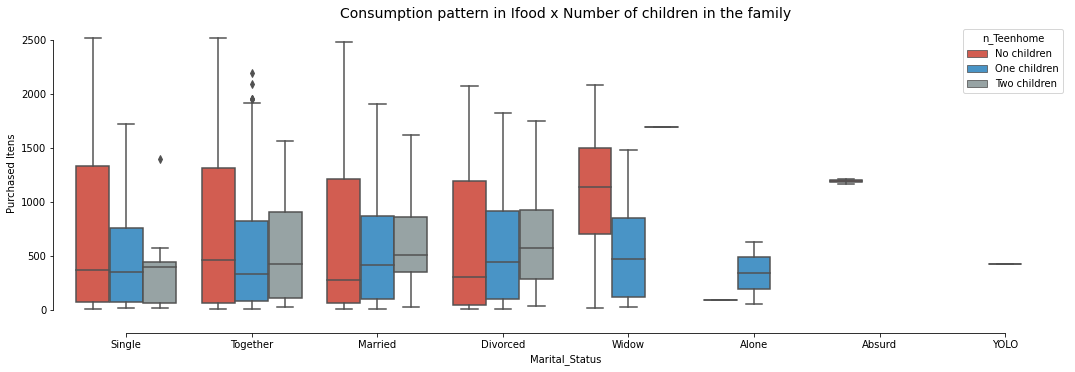

In [33]:
best_products['n_Teenhome'] = ifood_clear['Teenhome'].replace({0: 'No children', 1: 'One children', 2: 'Two children'})

plt.figure(figsize=(18, 5.5))
plt.title("Consumption pattern in Ifood x Number of children in the family", fontsize=14)
sns.boxplot(y='Purchased Itens', x='Marital_Status', hue='n_Teenhome', data=best_products)
sns.despine(offset=10, trim=True)

The boxplot chart gives us a very interesting insight. It is observed that 50% of widowers have a higher spending pattern than the average for all other categories. If they are more likely to spend, we could direct efforts and increase the range of supply for them.

Another point that draws attention is that the customers of the group "Absurd" (although in considerably fewer numbers) tend to buy much more. There is an opportunity here to target offers to this niche, knowing that they are prone to consumption.

**Boxplot: Consumption pattern in Ifood x Number of teen in the family**

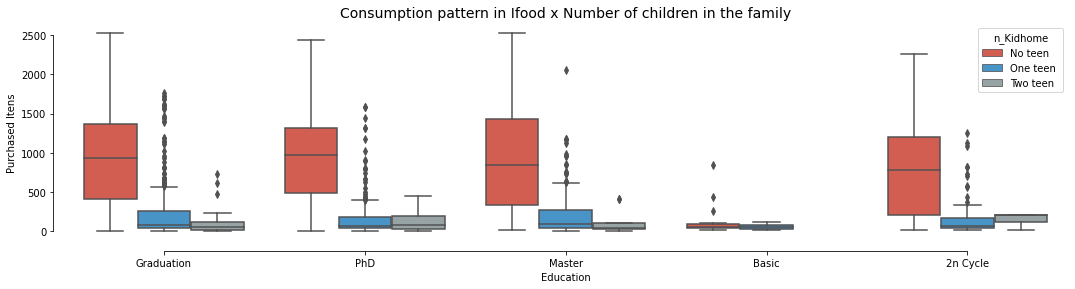

In [34]:
best_products['n_Kidhome'] = ifood_clear['Kidhome'].replace({0: 'No teen', 1: 'One teen ', 2: 'Two teen'})

plt.figure(figsize=(18, 4))
plt.title("Consumption pattern in Ifood x Number of children in the family", fontsize=14)
sns.boxplot(y='Purchased Itens', x='Education', hue='n_Kidhome', data=best_products)
sns.despine(offset=10, trim=True)

One thing that stands out in this analysis is that there are **many outliers** in families that have **a teenager at home**. This may suggest that the presence of an adolescent in the family has discrepancies in the consumption pattern of the families, when compared with the categories "no teenager" and "two adolescents".

**Detection of outliers in the income variable*

We will consider **outliers** to be values ​​greater than **2 standard deviations from the mean**.





In [35]:
income_outlier = ()
for x in ifood_clear['Income']:
  if( x > ifood_clear['Income'].mean() + 2 * np.std(ifood_clear['Income'])):
    income_outlier = x
    print(income_outlier)

157243.0
102692.0
162397.0
105471.0
153924.0
160803.0
157733.0
157146.0
113734.0
156924.0
666666.0


**Removing outliers**

In [36]:
ifood_clear = ifood_clear.drop(ifood_clear[(ifood_clear.Income > ifood_clear.Income.mean() + 2 * np.std(ifood_clear.Income))].index)

**Income distribution**

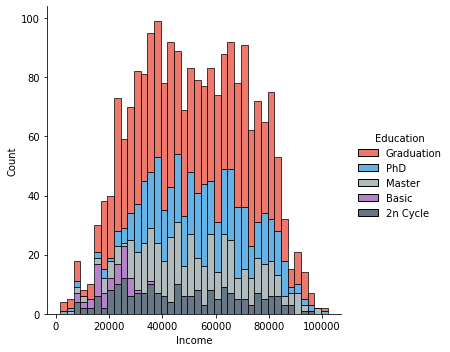

In [37]:
sns.displot(data=ifood_clear, x='Income', bins=40, hue='Education', multiple='stack')

In [38]:
print('The average bi-annual income of clients is R$', np.round(ifood_clear['Income'].mean(), 0))
print('The average annual income of clients is R$', np.round(ifood_clear['Income'].mean()/2, 0))

The average bi-annual income of clients is R$ 51558.0
The average annual income of clients is R$ 25779.0


We can see that customers with a "PhD" level of education have **less variability in bi-annual income**. With this information, we can direct efforts to retain them on our base - these customers are more likely to continue with this consumption pattern.

**Knowing the customer's age distribution**

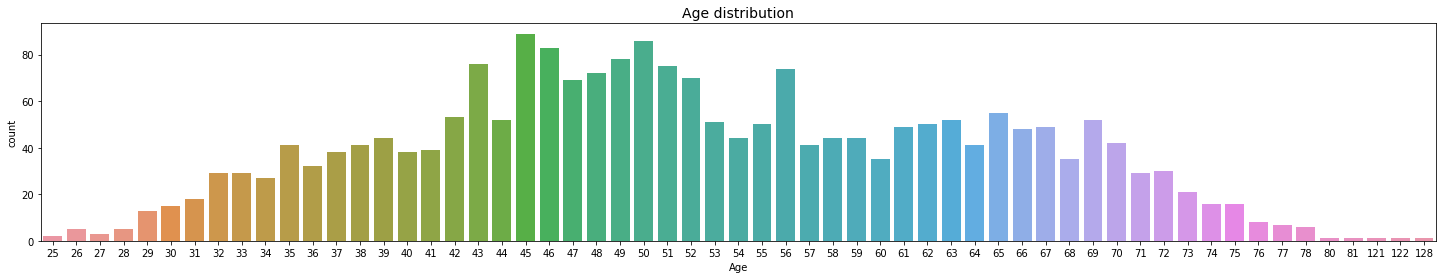

In [39]:
best_products['Age'] = pd.to_datetime("now").year - best_products["Year_Birth"]

plt.figure(figsize=(25, 4))
plt.title("Age distribution", fontsize=14)
sns.countplot(x='Age', data=best_products)

In [40]:
print('The customers average age is', np.round(best_products['Age'].mean(), 0), 'years.')

The customers average age is 52.0 years.


It is somewhat surprising to see that the **average age** of customers is **'high**' - 52 years old. This analysis is important, customers in this age group with more specific eating habits and, not infrequently, choose healthier products, even if the cost is higher. It is worth considering the following products for this group of customers: fish, salads, fruits and grains.

**Proportion of the number of kids in the family**

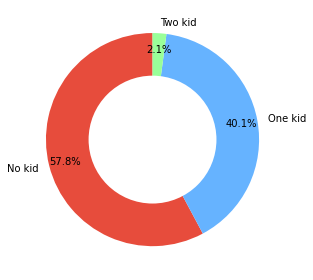

In [41]:
labels = ['No kid', 'One kid', 'Two kid']
sizes = [ifood_clear['Kidhome'].value_counts()]
colors = ['#e74c3c','#66b3ff','#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

**Proportion of the number of teens in the family**

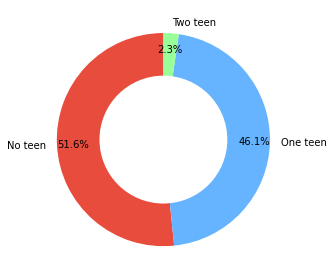

In [42]:
labels = ['No teen', 'One teen', 'Two teen']
sizes = [ifood_clear['Teenhome'].value_counts()]
colors = ['#e74c3c','#66b3ff','#99ff99']
 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

It is important to note that almost half of the customers have a teenager in the family. One way to ** engage ** customers is to create ** emotional bonds ** with them.

It is worth offering treats and messages in this context, to keep them satisfied with ifood.

**Building a dataframe for shopping channels and web visits**

In [43]:
purchases = ifood_clear.loc[:, ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
purchases.columns = ['Deals', 'Web', 'Catalog', 'Store', 'Visits_Month']

**Stacking the data to build the boxplot**

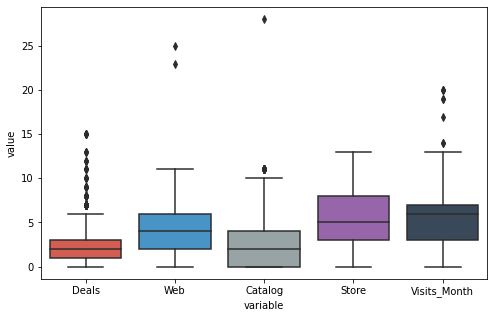

In [44]:
purchase_melt = pd.melt(purchases)

plt.figure(figsize=(8, 5))
sns.boxplot(y='value', x='variable', data=purchase_melt)

It is observed that customers prefer to buy directly in stores. Another relevant point is that there is an **opportunity to maximize the share of sales through the catalog**, since this indicator is lower than "Web" and "Store".

**A magnifying glass in the "MntWines" variable**

We already know that customers love ** wines **. Now let's see in which **months** this product is **most wanted**.

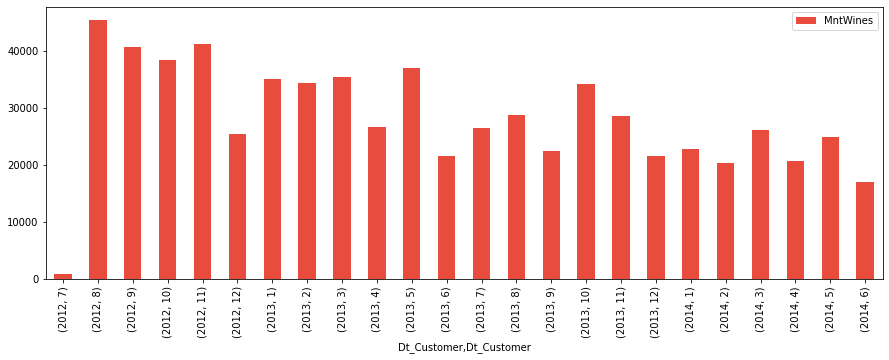

In [45]:
wine_temp_series = ifood_clear.loc[:, ['MntWines', 'Dt_Customer']]
wine_temp_series['Dt_Customer'] = pd.to_datetime(wine_temp_series['Dt_Customer'])
wine_group = wine_temp_series.groupby([wine_temp_series['Dt_Customer'].dt.year, wine_temp_series['Dt_Customer'].dt.month]).agg({'MntWines':sum})

wine_group.plot(kind='bar',figsize=(15,5))
plt.show()

In [49]:
var = np.round(((18000/45000-1)*100),2)

print('The quantity reducation of wines sold in the period was', var, '%.')

The quantity reducation of wines sold in the period was -60.0 %.


It is a pity that our #foodlovers **are failing to enjoy** candlelight dinners accompanied by a good wine ". The significant reduction in the amount of wines purchased over time is an excellent **opportunity to improve** our range of options, prices and also to encourage our partners in offering these products.